In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#pip install xgboost
#from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

# Any results you write to the current directory are saved as output.

In [2]:
loan = pd.read_csv('Loans - Training Set.csv')

C:\Users\gowth\AppData\Local\Temp\ipykernel_10832\2964645122.py:1: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('Loans - Training Set.csv')


In [3]:
loan

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.00,< 1 year,Rent,46643.00,Debt Consolidation,777.39,18.00,10.00,12,0,6762,7946,0.00,0.00
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.00,10+ years,Home Mortgage,81099.00,Debt Consolidation,892.09,26.70,NaN,14,0,35706,77961,0.00,0.00
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.00,9 years,Home Mortgage,60438.00,Home Improvements,1244.02,16.70,32.00,11,1,11275,14815,1.00,0.00
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.00,3 years,Rent,34171.00,Debt Consolidation,990.94,10.00,NaN,21,0,7009,43533,0.00,0.00
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.00,10+ years,Home Mortgage,47003.00,Home Improvements,503.71,16.70,25.00,13,1,16913,19553,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Fully Paid,15654,Long Term,686.00,10+ years,Rent,43050.00,Debt Consolidation,889.69,14.10,49.00,18,0,14730,29757,0.00,0.00
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Fully Paid,15237,Short Term,706.00,10+ years,Home Mortgage,60948.00,Debt Consolidation,700.90,15.90,48.00,11,0,17733,23060,0.00,0.00
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Fully Paid,10413,Short Term,719.00,5 years,Home Mortgage,66945.00,Debt Consolidation,1210.59,8.70,NaN,11,0,5205,6348,0.00,0.00
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Fully Paid,34447,Short Term,626.00,10+ years,Home Mortgage,78736.00,Debt Consolidation,1476.30,30.40,9.00,12,0,32318,37580,0.00,0.00


In [4]:
print("Number of rows:", loan.shape[0])
print("Number of columns:", loan.shape[1])

Number of rows: 111107
Number of columns: 19


In [5]:
loan.shape

(111107, 19)

In [6]:
loan.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,111107.00,89769.00,89769.00,111107.00,52104.00,111107.00,111107.00,111107.00,110879.00,111096.00
mean,11477180.22,1075.80,72486.00,18.20,34.90,11.13,0.17,15483.14,0.12,0.03
std,31855079.73,1474.13,55930.94,7.01,21.97,5.01,0.48,19821.15,0.35,0.26
min,491.00,585.00,4033.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00
25%,8162.00,705.00,44688.00,13.50,16.00,8.00,0.00,5905.00,0.00,0.00
50%,14183.00,724.00,61752.00,16.90,32.00,10.00,0.00,11027.00,0.00,0.00
75%,23822.00,741.00,86887.00,21.70,51.00,14.00,0.00,19338.00,0.00,0.00
max,99999999.00,7510.00,8713547.00,70.50,176.00,76.00,15.00,1730472.00,7.00,15.00


Here, we see something strange. If you notice the average credit scoe is 1076+ which is strange considering the credit score are within th range of 300-850. Let's take a look and try to find sense of the credit score data and check if there are any score that are greater than 800.

In [7]:
df = loan[loan['Credit Score']>800]
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.00,< 1 year,Rent,46643.00,Debt Consolidation,777.39,18.00,10.00,12,0,6762,7946,0.00,0.00
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.00,10+ years,Home Mortgage,81099.00,Debt Consolidation,892.09,26.70,NaN,14,0,35706,77961,0.00,0.00
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.00,9 years,Home Mortgage,60438.00,Home Improvements,1244.02,16.70,32.00,11,1,11275,14815,1.00,0.00
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.00,3 years,Rent,34171.00,Debt Consolidation,990.94,10.00,NaN,21,0,7009,43533,0.00,0.00
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.00,10+ years,Home Mortgage,47003.00,Home Improvements,503.71,16.70,25.00,13,1,16913,19553,1.00,0.00


In [8]:
loan.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

### Anamoly 1

Here, we see something strange. If you notice the average credit score is 1076+ which is strange considering the credit score are within the range of 300-850. Let's take a look and try to find sense of the credit score data and check if there are any score that are greater than 800.

In [9]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.00,< 1 year,Rent,46643.00,Debt Consolidation,777.39,18.00,10.00,12,0,6762,7946,0.00,0.00
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.00,10+ years,Home Mortgage,81099.00,Debt Consolidation,892.09,26.70,NaN,14,0,35706,77961,0.00,0.00
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.00,9 years,Home Mortgage,60438.00,Home Improvements,1244.02,16.70,32.00,11,1,11275,14815,1.00,0.00
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.00,3 years,Rent,34171.00,Debt Consolidation,990.94,10.00,NaN,21,0,7009,43533,0.00,0.00
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.00,10+ years,Home Mortgage,47003.00,Home Improvements,503.71,16.70,25.00,13,1,16913,19553,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,dddda579-91fc-479b-98b7-e035de24e924,fcd51025-8954-4b5b-816f-39cb1e66fc1f,Charged Off,19874,Long Term,7010.00,6 years,Own Home,54654.00,Debt Consolidation,1202.38,14.30,NaN,15,0,21693,25949,0.00,0.00
5040,5154e83f-4f72-431b-b6e5-c5a94f08a74a,dd2602f3-fba7-4a44-b2c6-2e722638838a,Charged Off,11199,Short Term,7180.00,3 years,Rent,40176.00,Debt Consolidation,736.56,8.80,NaN,17,0,5674,14079,0.00,0.00
5041,bebce2e5-bd21-4f6b-a5df-0e042b17ad24,9cd162b4-defa-4ab7-b5c4-252ff1be0e0c,Charged Off,12072,Long Term,7110.00,5 years,Home Mortgage,130780.00,Debt Consolidation,1547.56,9.80,NaN,17,0,18863,21532,0.00,0.00
5042,031a7b4f-2b0f-4f09-97c0-942da5ec7d98,d22f8176-c506-4fba-b8b9-fb97a47a7cd2,Charged Off,5612,Short Term,7330.00,10+ years,Rent,68915.00,Debt Consolidation,1349.58,15.60,NaN,14,1,2262,12927,1.00,0.00


#### 5044 rows are having credit score greater than 850. So We should divide these by 10

In [10]:
loan['Credit Score'] = loan['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

In [11]:
loan

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,728.00,< 1 year,Rent,46643.00,Debt Consolidation,777.39,18.00,10.00,12,0,6762,7946,0.00,0.00
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,733.00,10+ years,Home Mortgage,81099.00,Debt Consolidation,892.09,26.70,NaN,14,0,35706,77961,0.00,0.00
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,724.00,9 years,Home Mortgage,60438.00,Home Improvements,1244.02,16.70,32.00,11,1,11275,14815,1.00,0.00
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,740.00,3 years,Rent,34171.00,Debt Consolidation,990.94,10.00,NaN,21,0,7009,43533,0.00,0.00
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,686.00,10+ years,Home Mortgage,47003.00,Home Improvements,503.71,16.70,25.00,13,1,16913,19553,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Fully Paid,15654,Long Term,686.00,10+ years,Rent,43050.00,Debt Consolidation,889.69,14.10,49.00,18,0,14730,29757,0.00,0.00
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Fully Paid,15237,Short Term,706.00,10+ years,Home Mortgage,60948.00,Debt Consolidation,700.90,15.90,48.00,11,0,17733,23060,0.00,0.00
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Fully Paid,10413,Short Term,719.00,5 years,Home Mortgage,66945.00,Debt Consolidation,1210.59,8.70,NaN,11,0,5205,6348,0.00,0.00
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Fully Paid,34447,Short Term,626.00,10+ years,Home Mortgage,78736.00,Debt Consolidation,1476.30,30.40,9.00,12,0,32318,37580,0.00,0.00


In [12]:
loan.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,111107.00,89769.00,89769.00,111107.00,52104.00,111107.00,111107.00,111107.00,110879.00,111096.00
mean,11477180.22,716.29,72486.00,18.20,34.90,11.13,0.17,15483.14,0.12,0.03
std,31855079.73,28.29,55930.94,7.01,21.97,5.01,0.48,19821.15,0.35,0.26
min,491.00,585.00,4033.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00
25%,8162.00,703.00,44688.00,13.50,16.00,8.00,0.00,5905.00,0.00,0.00
50%,14183.00,722.00,61752.00,16.90,32.00,10.00,0.00,11027.00,0.00,0.00
75%,23822.00,738.00,86887.00,21.70,51.00,14.00,0.00,19338.00,0.00,0.00
max,99999999.00,751.00,8713547.00,70.50,176.00,76.00,15.00,1730472.00,7.00,15.00


#### Label encoding to Loan Status

In [13]:
le = preprocessing.LabelEncoder()
loan['Loan Status'] = le.fit_transform(loan['Loan Status'])

In [14]:
loan

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,0,12232,Short Term,728.00,< 1 year,Rent,46643.00,Debt Consolidation,777.39,18.00,10.00,12,0,6762,7946,0.00,0.00
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,0,25014,Long Term,733.00,10+ years,Home Mortgage,81099.00,Debt Consolidation,892.09,26.70,NaN,14,0,35706,77961,0.00,0.00
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,0,16117,Short Term,724.00,9 years,Home Mortgage,60438.00,Home Improvements,1244.02,16.70,32.00,11,1,11275,14815,1.00,0.00
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,0,11716,Short Term,740.00,3 years,Rent,34171.00,Debt Consolidation,990.94,10.00,NaN,21,0,7009,43533,0.00,0.00
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,0,9789,Long Term,686.00,10+ years,Home Mortgage,47003.00,Home Improvements,503.71,16.70,25.00,13,1,16913,19553,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,1,15654,Long Term,686.00,10+ years,Rent,43050.00,Debt Consolidation,889.69,14.10,49.00,18,0,14730,29757,0.00,0.00
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,1,15237,Short Term,706.00,10+ years,Home Mortgage,60948.00,Debt Consolidation,700.90,15.90,48.00,11,0,17733,23060,0.00,0.00
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,1,10413,Short Term,719.00,5 years,Home Mortgage,66945.00,Debt Consolidation,1210.59,8.70,NaN,11,0,5205,6348,0.00,0.00
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,1,34447,Short Term,626.00,10+ years,Home Mortgage,78736.00,Debt Consolidation,1476.30,30.40,9.00,12,0,32318,37580,0.00,0.00


Loan Status is the categorical variable here denoting if the certain variable is paid off or not. In this notebook, we aim to predict that as our final output.

<AxesSubplot:title={'center':'Status of the Loan'}>

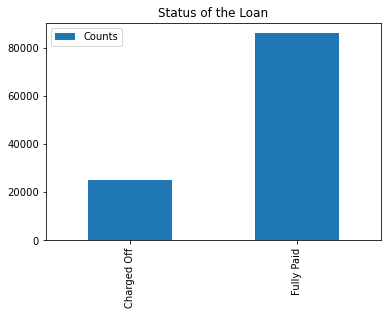

In [15]:
coffvalue = loan[loan['Loan Status'] == 0]['Loan Status'].count()
fpaidvalue = loan[loan['Loan Status'] == 1]['Loan Status'].count()
data = {"Counts":[coffvalue, fpaidvalue] }
statusDF = pd.DataFrame(data, index=["Charged Off", "Fully Paid"])
# statusDF.head()
statusDF.plot(kind='bar', title="Status of the Loan")

In [16]:
print(coffvalue)
print(fpaidvalue)

25173
85934


In [17]:
print("Value counts for each term: \n",loan['Term'].value_counts())
print("Missing data in loan term:",loan['Term'].isna().sum())

Value counts for each term: 
 Short Term    80274
Long Term     30833
Name: Term, dtype: int64
Missing data in loan term: 0


In [18]:
loan['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True)
loan.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,0,12232,0,728.00,< 1 year,Rent,46643.00,Debt Consolidation,777.39,18.00,10.00,12,0,6762,7946,0.00,0.00
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,0,25014,1,733.00,10+ years,Home Mortgage,81099.00,Debt Consolidation,892.09,26.70,NaN,14,0,35706,77961,0.00,0.00
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,0,16117,0,724.00,9 years,Home Mortgage,60438.00,Home Improvements,1244.02,16.70,32.00,11,1,11275,14815,1.00,0.00
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,0,11716,0,740.00,3 years,Rent,34171.00,Debt Consolidation,990.94,10.00,NaN,21,0,7009,43533,0.00,0.00
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,0,9789,1,686.00,10+ years,Home Mortgage,47003.00,Home Improvements,503.71,16.70,25.00,13,1,16913,19553,1.00,0.00


In [19]:
scount = loan[loan['Term'] == 0]['Term'].count()
lcount = loan[loan['Term'] ==1]['Term'].count()

data = {"Counts":[scount, lcount]}
termDF = pd.DataFrame(data, index=["Short Term", "Long Term"])
termDF.head()

,Counts
Short Term,80274
Long Term,30833


<AxesSubplot:title={'center':'Term of Loans'}>

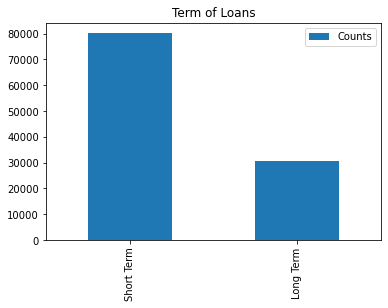

In [20]:
termDF.plot(kind="bar", title="Term of Loans")

Since credit score is one of the important part of our analysis, we first try to explore and handle our missing data before processing further with anything.

In [21]:
print("There are ", loan['Credit Score'].isna().sum(), "null values for Credit score.")

There are  21338 null values for Credit score.


Since there are multiple ways to handle the missing data, one of which is to fill in the average of the column in the place of missing data. Here we follow the same concept but with a small tweak. We asume that the credit score of people having short term loan wouldn't be the same as credit score of people having long term loans. Hence we take separate average of credit score of people with short term loan and separate average of people with long term loan and then fill the missing credit score looking up at the term of the loan.

In [22]:
cscoredf = loan[loan['Term']==0]
stermAVG = cscoredf['Credit Score'].mean()
print(stermAVG)

724.6148930864659


In [23]:
lscoredf = loan[loan['Term']==1]
ltermAVG = lscoredf['Credit Score'].mean()
print(ltermAVG)

695.4355399336067


In [24]:
loan

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,0,12232,0,728.00,< 1 year,Rent,46643.00,Debt Consolidation,777.39,18.00,10.00,12,0,6762,7946,0.00,0.00
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,0,25014,1,733.00,10+ years,Home Mortgage,81099.00,Debt Consolidation,892.09,26.70,NaN,14,0,35706,77961,0.00,0.00
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,0,16117,0,724.00,9 years,Home Mortgage,60438.00,Home Improvements,1244.02,16.70,32.00,11,1,11275,14815,1.00,0.00
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,0,11716,0,740.00,3 years,Rent,34171.00,Debt Consolidation,990.94,10.00,NaN,21,0,7009,43533,0.00,0.00
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,0,9789,1,686.00,10+ years,Home Mortgage,47003.00,Home Improvements,503.71,16.70,25.00,13,1,16913,19553,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,1,15654,1,686.00,10+ years,Rent,43050.00,Debt Consolidation,889.69,14.10,49.00,18,0,14730,29757,0.00,0.00
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,1,15237,0,706.00,10+ years,Home Mortgage,60948.00,Debt Consolidation,700.90,15.90,48.00,11,0,17733,23060,0.00,0.00
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,1,10413,0,719.00,5 years,Home Mortgage,66945.00,Debt Consolidation,1210.59,8.70,NaN,11,0,5205,6348,0.00,0.00
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,1,34447,0,626.00,10+ years,Home Mortgage,78736.00,Debt Consolidation,1476.30,30.40,9.00,12,0,32318,37580,0.00,0.00


In [25]:
loan.loc[(loan.Term ==0) & (loan['Credit Score'].isnull()),'Credit Score'] = stermAVG

In [26]:
loan.loc[(loan.Term ==1) & (loan['Credit Score'].isnull()),'Credit Score'] = ltermAVG

In [27]:
loan

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,0,12232,0,728.00,< 1 year,Rent,46643.00,Debt Consolidation,777.39,18.00,10.00,12,0,6762,7946,0.00,0.00
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,0,25014,1,733.00,10+ years,Home Mortgage,81099.00,Debt Consolidation,892.09,26.70,NaN,14,0,35706,77961,0.00,0.00
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,0,16117,0,724.00,9 years,Home Mortgage,60438.00,Home Improvements,1244.02,16.70,32.00,11,1,11275,14815,1.00,0.00
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,0,11716,0,740.00,3 years,Rent,34171.00,Debt Consolidation,990.94,10.00,NaN,21,0,7009,43533,0.00,0.00
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,0,9789,1,686.00,10+ years,Home Mortgage,47003.00,Home Improvements,503.71,16.70,25.00,13,1,16913,19553,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,1,15654,1,686.00,10+ years,Rent,43050.00,Debt Consolidation,889.69,14.10,49.00,18,0,14730,29757,0.00,0.00
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,1,15237,0,706.00,10+ years,Home Mortgage,60948.00,Debt Consolidation,700.90,15.90,48.00,11,0,17733,23060,0.00,0.00
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,1,10413,0,719.00,5 years,Home Mortgage,66945.00,Debt Consolidation,1210.59,8.70,NaN,11,0,5205,6348,0.00,0.00
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,1,34447,0,626.00,10+ years,Home Mortgage,78736.00,Debt Consolidation,1476.30,30.40,9.00,12,0,32318,37580,0.00,0.00


In [28]:
print("There are ", loan['Credit Score'].isna().sum(), "null values for Credit score.")

There are  0 null values for Credit score.
